In [1]:
import json
import pandas as pd
import numpy as np

In [4]:
with open('../webscraping/data/jura_forum_1599411154273.json') as json_file:
    data = json.load(json_file)
print(len(data))
question_num = len(data)

1050


In [5]:
print(question_num)

1050


In [6]:
df = pd.DataFrame(data, columns =['question', 'answer', 'tags'])  
df

,question,answer,tags
0,Werkverträge und Leiharbeit in der Fleischindu...,Werkverträge und Leiharbeit in der Fleischindu...,"[Werkverträge, Leiharbeit, Verbot, Fleischindu..."
1,Zur Wirksamkeit einer Rückzahlungsvereinbarung...,Weiterbildung ist ein Grundbestandteil der Per...,"[Fortbildungskosten, Rückzahlungsvereinbarung]"
2,"Was Arbeitgeber dürfen, um den Arbeitnehmer zu...",Bei der Beendigung eines Arbeitsverhältnisses ...,"[Beschäftigungsanspruch, Verhandlungstaktik]"
3,Corona: Droht eine Welle von betriebsbedingten...,Corona: Droht eine Welle von betriebsbedingten...,"[Corona, Kündigung, betriebsbedingt, Entlassun..."
4,"Beschäftigungsverhältnisse mit Sportlern, Trai...",Das Sportarbeitsrecht ist ebenfalls eine spezi...,"[Arbeitsrecht, Sportarbeitsrecht, Sportrecht]"
...,...,...,...
1045,Gesamtbetriebsrat muss trotz Corona-Pandemie k...,Berlin (jur). Auch im Zuge der Corona-Pandemie...,[]
1046,„Corona-Helden“ können keine Gratisbrillen bek...,Stuttgart (jur). Optiker dürfen keine kostenlo...,[]
1047,Wegen problematischer Kontaktverfolgung bleibe...,Koblenz (jur). Bordelle müssen aufgrund der Sc...,[]
1048,Schüler muss nach Widerspruch vorerst keine Ma...,Schleswig (jur). Wenn Schulen Regelungen zur M...,[]


In [7]:
df["answer_len"] = df["answer"].apply(lambda answer: len(answer))

In [8]:
df["question_len"] = df["question"].apply(lambda question: len(question))

In [11]:
df

,question,answer,tags,answer_len,question_len
0,Werkverträge und Leiharbeit in der Fleischindu...,Werkverträge und Leiharbeit in der Fleischindu...,"[Werkverträge, Leiharbeit, Verbot, Fleischindu...",3783,81
1,Zur Wirksamkeit einer Rückzahlungsvereinbarung...,Weiterbildung ist ein Grundbestandteil der Per...,"[Fortbildungskosten, Rückzahlungsvereinbarung]",5633,70
2,"Was Arbeitgeber dürfen, um den Arbeitnehmer zu...",Bei der Beendigung eines Arbeitsverhältnisses ...,"[Beschäftigungsanspruch, Verhandlungstaktik]",2047,121
3,Corona: Droht eine Welle von betriebsbedingten...,Corona: Droht eine Welle von betriebsbedingten...,"[Corona, Kündigung, betriebsbedingt, Entlassun...",4680,59
4,"Beschäftigungsverhältnisse mit Sportlern, Trai...",Das Sportarbeitsrecht ist ebenfalls eine spezi...,"[Arbeitsrecht, Sportarbeitsrecht, Sportrecht]",3206,63
...,...,...,...,...,...
1045,Gesamtbetriebsrat muss trotz Corona-Pandemie k...,Berlin (jur). Auch im Zuge der Corona-Pandemie...,[],2159,74
1046,„Corona-Helden“ können keine Gratisbrillen bek...,Stuttgart (jur). Optiker dürfen keine kostenlo...,[],1882,51
1047,Wegen problematischer Kontaktverfolgung bleibe...,Koblenz (jur). Bordelle müssen aufgrund der Sc...,[],1879,68
1048,Schüler muss nach Widerspruch vorerst keine Ma...,Schleswig (jur). Wenn Schulen Regelungen zur M...,[],2201,56


In [12]:
import matplotlib.pyplot as plt
def plot_hist(data, bins, x_label="", y_label=""):
    plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')

    plt.hist(data, bins=bins, edgecolor="k")
    plt.xticks(bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [13]:
def print_stats(data):
    print("Mean", np.mean(data))
    print("Max", np.max(data))
    print("Min", np.min(data))
    print("Std", np.std(data))

In [15]:
print("Answer length characteristics:")
print_stats(df["answer_len"])

Answer length characteristics:
Mean 4034.592380952381
Max 42925
Min 631
Std 3069.187740155839


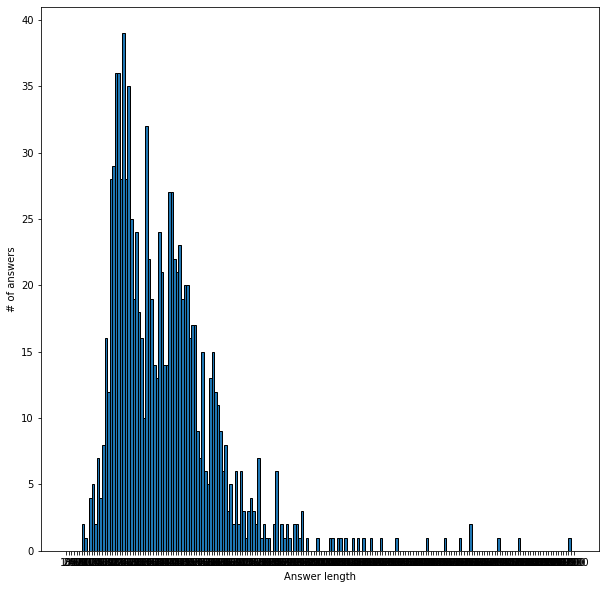

In [17]:
plot_hist(df["answer_len"], list(range(0, 20000, 100)), x_label="Answer length", y_label="# of answers")

In [18]:
question_lens = df['question_len']
print("Question length characteristics:")
print_stats(question_lens)

Question length characteristics:
Mean 60.486666666666665
Max 200
Min 11
Std 22.45007823368132


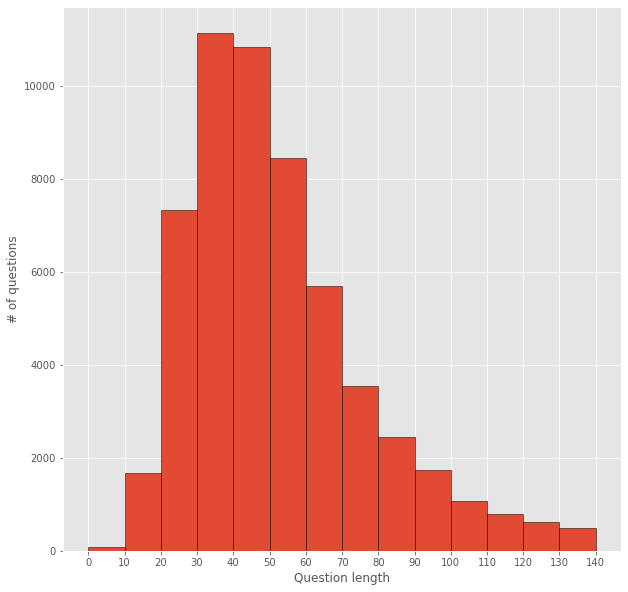

In [143]:
bins = list(range(0, 150, 10))
plot_hist(question_lens.values, bins, x_label="Question length", y_label="# of questions")

In [144]:
question_text_lens = df['question_text_len']
print("Question text length characteristics:")
print_stats(question_text_lens)

Question text length characteristics:
Mean 503.3174312246893
Max 3000
Min 0
Std 454.968622124977


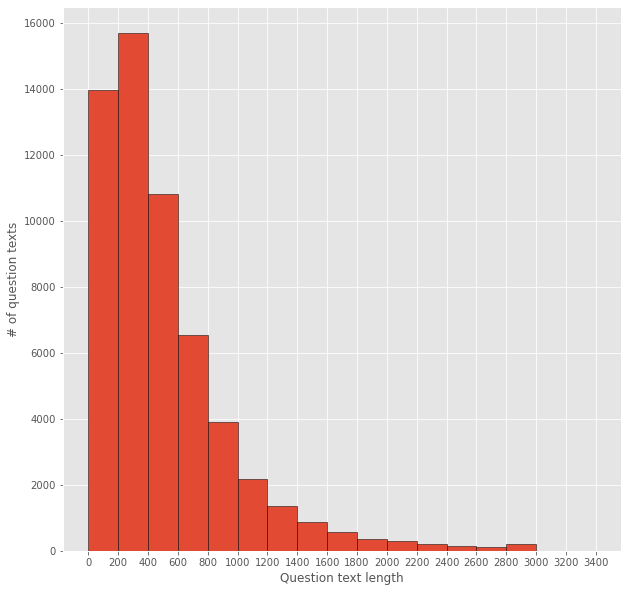

In [145]:
bins = list(range(0, 3500, 200))
plot_hist(question_text_lens.values, bins, x_label="Question text length", y_label="# of question texts")